## 아파트매매가격지수_시도_시_군_구

In [1]:
import pandas as pd
import numpy as np
import koreanize_matplotlib

In [2]:
raw = pd.read_csv("data/kosis_apt_price.csv", encoding="cp949")
raw

,행정구역별,2003. 11,2003. 12,2004. 01,2004. 02,2004. 03,2004. 04,2004. 05,2004. 06,2004. 07,...,2019. 08,2019. 09,2019. 10,2019. 11,2019. 12,2020. 01,2020. 02,2020. 03,2020. 04,2020. 05
0,전국,63.2,62.9,62.7,62.9,63.2,63.4,63.5,63.5,63.4,...,98.0,97.9,98.0,98.2,98.7,99.1,99.6,100.4,100.7,100.9
1,서울특별시,61.6,61.2,61.0,61.4,61.7,62.1,62.2,62.1,61.9,...,107.2,107.4,108.1,108.8,110.1,110.6,110.8,110.9,110.8,110.5
2,부산광역시,59.8,59.3,59.2,59.2,59.3,59.4,59.5,59.4,59.1,...,93.7,93.4,93.1,93.2,93.7,93.9,93.9,93.9,93.8,93.7
3,대구광역시,61.7,61.1,60.9,61.0,61.3,61.4,61.4,61.4,61.5,...,102.7,102.7,102.8,103.0,103.2,103.7,104.0,104.0,103.8,103.8
4,인천광역시,67.1,66.6,66.4,66.6,66.6,66.8,66.8,66.7,66.8,...,99.1,99.3,99.4,99.6,100.1,100.3,100.9,103.3,104.9,105.8
5,광주광역시,58.3,58.0,57.9,58.1,58.2,58.3,58.3,58.5,58.7,...,103.2,103.1,103.0,103.1,103.1,103.2,103.3,103.3,103.3,103.2
6,대전광역시,75.4,74.6,74.9,75.6,76.0,76.6,77.5,77.9,78.1,...,104.8,106.1,107.7,109.3,110.8,112.6,114.2,116.1,117.4,117.9
7,울산광역시,51.5,51.1,51.1,51.2,51.6,52.1,52.7,52.8,52.9,...,85.7,85.5,85.7,86.0,86.5,86.9,87.3,87.8,87.9,88.1
8,세종특별자치시,-,-,-,-,-,-,-,-,-,...,98.0,97.8,97.8,97.8,98.8,101.0,103.4,108.8,110.7,111.1
9,경기도,66.8,66.5,66.2,66.3,66.5,66.7,66.6,66.3,66.0,...,99.6,99.7,99.9,100.2,100.9,101.6,102.7,104.6,105.7,106.2


In [3]:
df = raw.melt(id_vars="행정구역별")
df.columns = ["지역", "기간", "아파트매매가격지수"]
df.head()

,지역,기간,아파트매매가격지수
0,전국,2003. 11,63.2
1,서울특별시,2003. 11,61.6
2,부산광역시,2003. 11,59.8
3,대구광역시,2003. 11,61.7
4,인천광역시,2003. 11,67.1


In [4]:
df["연도"] = df["기간"].str.split(".", expand=True)[0]
df["월"] = df["기간"].str.split(".", expand=True)[1]

In [5]:
df["아파트매매가격지수"] = df["아파트매매가격지수"].replace("-", np.nan)

In [6]:
df["아파트매매가격지수"] = pd.to_numeric(df["아파트매매가격지수"])

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font="AppleGothic")

In [8]:
df_local = df[df["지역"].isin(["전국", "서울특별시"])]
df_local.head()

,지역,기간,아파트매매가격지수,연도,월
0,전국,2003. 11,63.2,2003,11
1,서울특별시,2003. 11,61.6,2003,11
18,전국,2003. 12,62.9,2003,12
19,서울특별시,2003. 12,61.2,2003,12
36,전국,2004. 01,62.7,2004,01


In [9]:
df.describe()

,아파트매매가격지수
count,3474.000000
mean,85.040299
std,15.046839
min,51.100000
25%,71.600000
50%,90.100000
75%,98.300000
max,117.900000


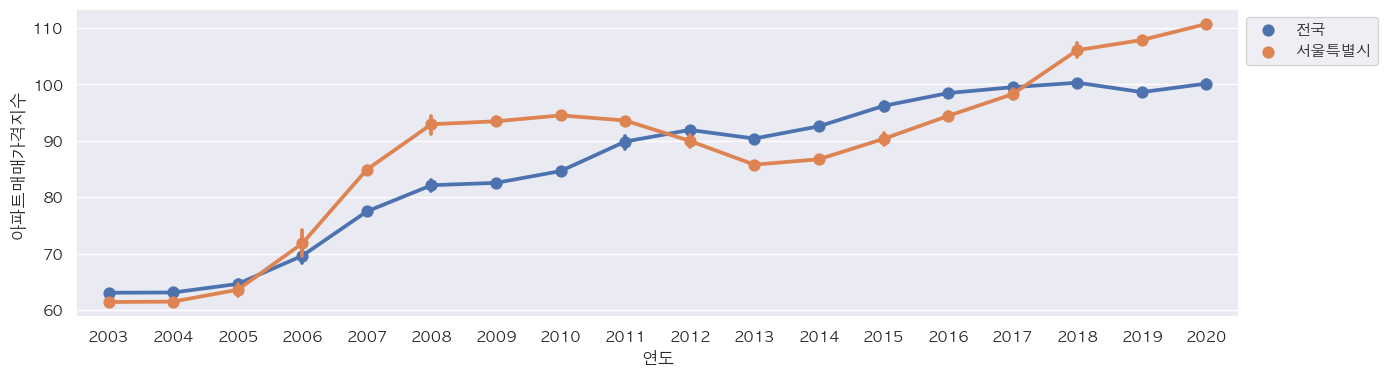

In [10]:
plt.figure(figsize=(15, 4))
sns.pointplot(data=df_local, x="연도", y="아파트매매가격지수", hue="지역")
plt.legend(bbox_to_anchor=(1, 1))

In [11]:
df_local = df[df["지역"] != "전국"]
df_local.head()

,지역,기간,아파트매매가격지수,연도,월
1,서울특별시,2003. 11,61.6,2003,11
2,부산광역시,2003. 11,59.8,2003,11
3,대구광역시,2003. 11,61.7,2003,11
4,인천광역시,2003. 11,67.1,2003,11
5,광주광역시,2003. 11,58.3,2003,11


In [12]:
table = df.groupby(["연도","지역"])["아파트매매가격지수"].mean().unstack().round(1)
table.fillna(0).astype(int).style.background_gradient()

지역,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전국,전라남도,전라북도,제주특별자치도,충청남도,충청북도
연도,,,,,,,,,,,,,,,,,,
2003,63,66,60,63,58,61,75,59,61,0,51,66,63,62,56,53,73,59
2004,66,65,61,64,58,61,77,59,61,0,52,66,63,61,57,53,74,60
2005,70,67,63,66,62,64,77,58,63,0,55,65,64,61,60,53,77,64
2006,72,75,64,72,65,68,77,57,71,0,60,67,69,63,64,53,77,69
2007,71,92,65,77,66,67,74,57,84,0,69,78,77,65,67,54,77,69
2008,71,98,67,77,67,65,74,60,92,0,72,94,82,73,72,56,77,71
2009,72,96,69,74,67,62,76,62,93,0,72,99,82,77,75,58,79,71
2010,73,95,75,75,68,63,82,70,94,0,75,98,84,82,83,63,80,74
2011,81,94,95,79,79,69,95,86,93,0,83,96,89,90,95,68,85,85


In [13]:
df

,지역,기간,아파트매매가격지수,연도,월
0,전국,2003. 11,63.2,2003,11
1,서울특별시,2003. 11,61.6,2003,11
2,부산광역시,2003. 11,59.8,2003,11
3,대구광역시,2003. 11,61.7,2003,11
4,인천광역시,2003. 11,67.1,2003,11
...,...,...,...,...,...
3577,전라북도,2020. 05,94.2,2020,05
3578,전라남도,2020. 05,101.9,2020,05
3579,경상북도,2020. 05,87.3,2020,05
3580,경상남도,2020. 05,86.2,2020,05


In [14]:
corr = df[df["지역"] != "전국"].set_index("지역").T.iloc[1:].corr()
corr.iloc[:10, :10]

지역,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도
지역,,,,,,,,,,
서울특별시,1.000000,1.000000,1.000000,0.999997,0.999999,0.999981,0.999990,1.0,0.999997,1.000000
부산광역시,1.000000,1.000000,1.000000,0.999995,1.000000,0.999976,0.999993,1.0,0.999995,0.999998
대구광역시,1.000000,1.000000,1.000000,0.999997,0.999999,0.999981,0.999990,1.0,0.999997,1.000000
인천광역시,0.999997,0.999995,0.999997,1.000000,0.999992,0.999993,0.999976,1.0,1.000000,0.999999
광주광역시,0.999999,1.000000,0.999999,0.999992,1.000000,0.999971,0.999995,1.0,0.999993,0.999997
대전광역시,0.999981,0.999976,0.999981,0.999993,0.999971,1.000000,0.999943,1.0,0.999993,0.999986
울산광역시,0.999990,0.999993,0.999990,0.999976,0.999995,0.999943,1.000000,1.0,0.999977,0.999985
세종특별자치시,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
경기도,0.999997,0.999995,0.999997,1.000000,0.999993,0.999993,0.999977,1.0,1.000000,0.999999
